# [라이브러리 & 데이터]



*  title : 영화의 제목
* distributor : 배급사
* genre : 장르
* release_time : 개봉일
* time : 상영시간(분)
* screening_rat : 상영등급
* director : 감독이름
* dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
* dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
* num_staff : 스텝수
* num_actor : 주연배우수
* box_off_num : 관객



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
#한글폰트 깨짐 현상 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/movies_train.csv')
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


# 1. genre - num_staff 관계

: 어떤 장르가 스텝 수를 많이 필요로하는 지 파악해보기

* 액션 장르의 **평균스텝수**가 약 338명으로 가장 많음을 알 수 있다.
* 다큐멘터리 장르의 **평균스텝수**가 약 18명으로 가장 적음을 알 수 있다.
* 액션 장르의 스텝수 **중간값**이 약 339명으로 가장 많음을 알 수 있다.
* 뮤지컬 장르의 스텝수 **중간값**이 약 3명으로 가장 적음을 알 수 있다.

In [ ]:
# 장르 별 평균 스텝수 계산

train_gn = train.groupby('genre').mean()['num_staff']

print(train_gn)

genre
SF        197.307692
공포        176.380952
느와르       311.074074
다큐멘터리      17.849462
드라마       164.484163
멜로/로맨스    135.782051
뮤지컬         2.200000
미스터리      117.352941
서스펜스      111.000000
애니메이션      44.619048
액션        337.535714
코미디       209.075472
Name: num_staff, dtype: float64


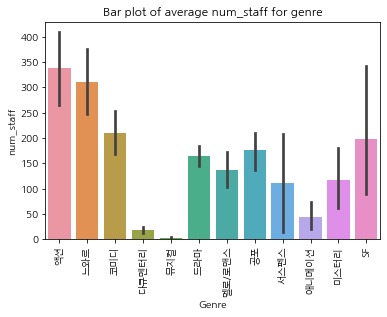

In [ ]:
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
ax = plt.subplots()
ax = sns.barplot(x = 'genre',y = 'num_staff',data=train)
ax.set_title('Bar plot of average num_staff for genre')
ax.set_xlabel('Genre')
ax.set_ylabel('num_staff')
plt.xticks(fontsize=10,rotation=90)
plt.show()


In [ ]:
#중간값 계산
train.groupby('genre').median()['num_staff']

genre
SF         82.0
공포        185.5
느와르       319.0
다큐멘터리       8.0
드라마       101.0
멜로/로맨스     66.5
뮤지컬         3.0
미스터리       92.0
서스펜스      111.0
애니메이션       8.0
액션        338.5
코미디       192.0
Name: num_staff, dtype: float64

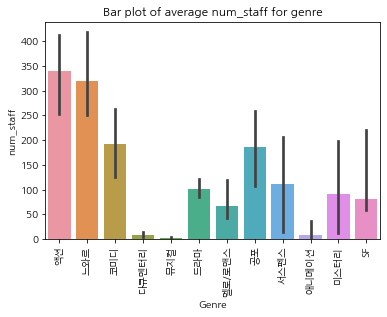

In [ ]:
#중간값으로 Bar Chart 그리기

import seaborn as sns
from numpy import median

ax = plt.subplots()
ax = sns.barplot(x = 'genre',y = 'num_staff',data=train,estimator = median)
ax.set_title('Bar plot of average num_staff for genre')
ax.set_xlabel('Genre')
ax.set_ylabel('num_staff')
plt.xticks(fontsize=10,rotation=90)
plt.show()



#2. genre - num_actor와의 관계

: 장르별 주연배우수에 차이가 있는지 확인해보기

* 각 장르변 평균 주연배우수에는 **큰 차이가 없음**
* 드라마, 멜로/로맨스 장르의 **편차가 큼**을 알 수 있음

In [ ]:
#장르별 주연배우 수의 평균 구하기

train.groupby('genre')['num_actor'].mean()

genre
SF        3.692308
공포        3.880952
느와르       3.592593
다큐멘터리     3.268817
드라마       3.647059
멜로/로맨스    3.410256
뮤지컬       2.800000
미스터리      2.882353
서스펜스      3.000000
애니메이션     5.666667
액션        3.607143
코미디       4.735849
Name: num_actor, dtype: float64

In [ ]:
#장르별 주연배우수의 최댓값 구하기

train.groupby('genre')['num_actor'].max()

genre
SF        10
공포        13
느와르       10
다큐멘터리     14
드라마       25
멜로/로맨스    22
뮤지컬        5
미스터리       4
서스펜스       4
애니메이션     10
액션        11
코미디       13
Name: num_actor, dtype: int64

In [ ]:
#장르별 주연배우수의 중간값 구하기

train.groupby('genre')['num_actor'].median()

genre
SF        3.0
공포        3.0
느와르       3.0
다큐멘터리     2.0
드라마       3.0
멜로/로맨스    3.0
뮤지컬       4.0
미스터리      3.0
서스펜스      3.0
애니메이션     6.0
액션        3.0
코미디       4.0
Name: num_actor, dtype: float64

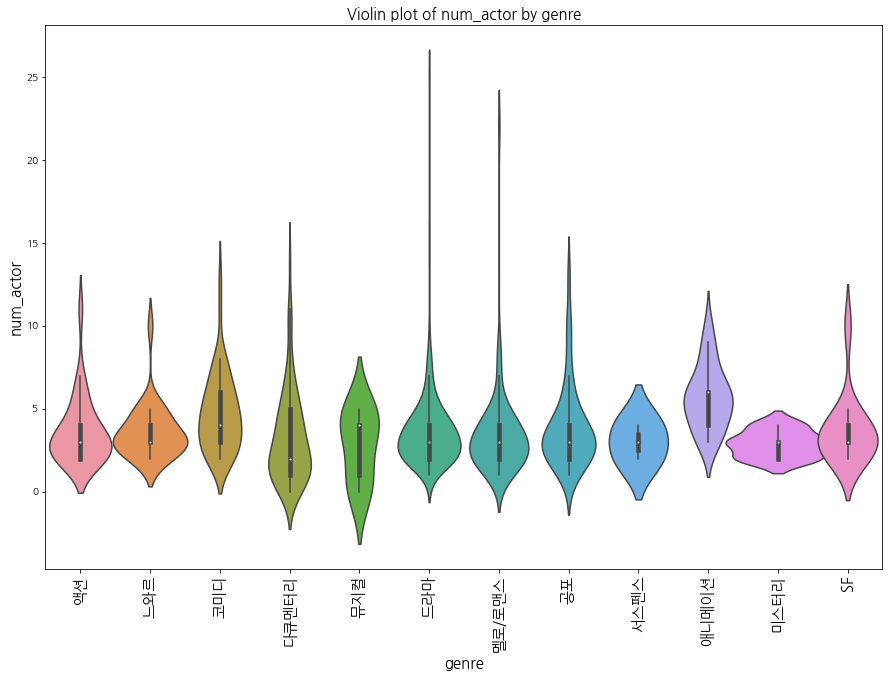

In [ ]:
plt.figure(figsize = (15,10))
ax = sns.violinplot(x = 'genre', y = 'num_actor',data=train,width=1.5)
ax.set_title('Violin plot of num_actor by genre',fontsize=15)
ax.set_xlabel('genre',fontsize=15)
ax.set_ylabel('num_actor',fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.show()

# 3. genre - dir_prev_num 의 관계

: 어떤 장르가 신인감독이 많은지 파악해보기

* **다큐멘터리**와 **애니메이션 장르**에서 신인감독이 많음.
* **뮤지컬** 장르에는 신인감독밖에 없음.


In [ ]:
#장르별 감독의 전작 수 Count
train.groupby('genre')['dir_prev_num'].value_counts()

genre   dir_prev_num
SF      0                 4
        2                 4
        1                 3
        3                 2
공포      0                21
        1                 9
        2                 5
        4                 4
        3                 2
        5                 1
느와르     0                 8
        1                 8
        2                 6
        3                 5
다큐멘터리   0                72
        1                11
        2                 6
        3                 2
        4                 2
드라마     0               125
        1                43
        2                32
        3                12
        4                 8
        5                 1
멜로/로맨스  0                38
        1                17
        2                12
        3                 9
        4                 1
        5                 1
뮤지컬     0                 5
미스터리    0                 6
        1                 5
        2                 4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

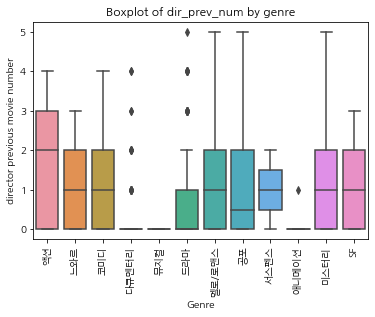

In [ ]:
#장르별 신인감독 비율 측정

import seaborn as sns

ax = plt.subplots()
ax = sns.boxplot(x = 'genre',y = 'dir_prev_num',data=train)
ax.set_title('Boxplot of dir_prev_num by genre')
ax.set_xlabel('Genre')
ax.set_ylabel('director previous movie number')
plt.xticks(fontsize=10,rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

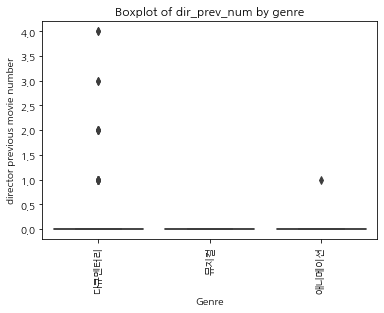

In [ ]:
ax = plt.subplots()
ax = sns.boxplot(x = 'genre',y = 'dir_prev_num',data=train,order=['다큐멘터리','뮤지컬','애니메이션'])
ax.set_title('Boxplot of dir_prev_num by genre')
ax.set_xlabel('Genre')
ax.set_ylabel('director previous movie number')
plt.xticks(fontsize=10,rotation=90)

# 4. month - box off num 관계 

:월 별 총 평균 관람객 수를 비교하여 특정 월에 관객수의 많고 적음을 파악해보기

- 연말인 12월에 평균 관객수는 약 1000만명으로 가장 많음을 알 수 있다.

- 다음으로 휴가철인 1,7,8월에도 평균 관람객수는 약 900만명으로 많은 편임을 알 수 있다.

- 새 학기가 시작되는 3,4월에 평균 관람객수는 약 200만명으로 가장 적음을 알 수 있다.

In [ ]:
# release_time 변수를 통해 month, year열 생성

train['month']=0 # train 데이터에 month열 생성
train['year']=0

# release_time을 '-'를 기준으로 분할하여 month, year열에 대입
for i in range(len(train)):
  train['month'][i]=train['release_time'].agg(lambda x: x.split('-'))[i][1]

for i in range(len(train)):
  train['year'][i]=train['release_time'].agg(lambda x: x.split('-'))[i][0]
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month,year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,11,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,11,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,6,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,7,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,11,2010


In [ ]:
print(train['year'].unique())
year_num=len(train['year'].unique()) # 2010~2015년까지 6개년의 데이터

# 월 별 평균 관객수가 많은 순서대로 정렬
((train[['month','box_off_num']].groupby('month').sum('box_off_num').sort_values(['box_off_num'],ascending=False))/year_num).astype('int') 

[2012 2015 2013 2010 2014 2011]


,box_off_num
month,
12,10520689
8,9433982
7,9096092
1,8878548
9,7315286
11,5947846
5,5469009
10,3859041
2,3425630


<function matplotlib.pyplot.show>

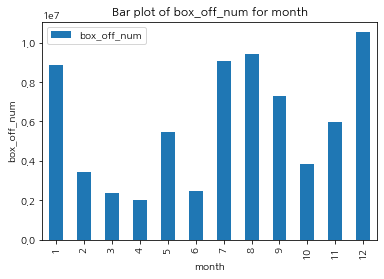

In [ ]:
# month와 box_off_num 간의 barplot 구하기
ax=((train[['month','box_off_num']].groupby('month').sum('box_off_num'))/year_num).astype('int').plot(kind='bar')
ax.set_title('Bar plot of box_off_num for month')
ax.set_xlabel('month')
ax.set_ylabel('box_off_num')
plt.show()

# 5. genre - year 관계
:연도 별로 장르 별 개봉한 영화의 개수를 파악하여 특정 장르의 영화가 얼마나 개봉했는지 파악해보기 

-> 특정 장르가 인기를 끌었던 시기 파악하기

- 매년 전반적으로 드라마 장르의 영화를 많이 개봉했으며 14년도에 특히 더 많았음을 알 수 있다.

- SF 장르의 영화를 15년도에 특히 더 많이 개봉했음을 알 수 있다.

- 공포 장르의 영화를 10,15년도에 특히 더 많이 개봉했음을 알 수 있다.

- 다큐멘터리 장르의 영화를 14년도에 특히 더 많이 개봉했음을 알 수 있다.

- 애니메이션 장르의 영화는 11,14,15년도에 많이 개봉했음을 알 수 있다.

In [ ]:
year_genre=train[['year','genre','title']].groupby(['year','genre']).count() # 연도 별 장르 별 개봉 영화 수
year_genre.reset_index(inplace=True)
year_genre.rename(columns={'title':'count'},inplace=True)
year_genre

,year,genre,count
0,2010,SF,1
1,2010,공포,9
2,2010,느와르,5
3,2010,다큐멘터리,14
4,2010,드라마,36
...,...,...,...
59,2015,뮤지컬,1
60,2015,미스터리,4
61,2015,애니메이션,5
62,2015,액션,7


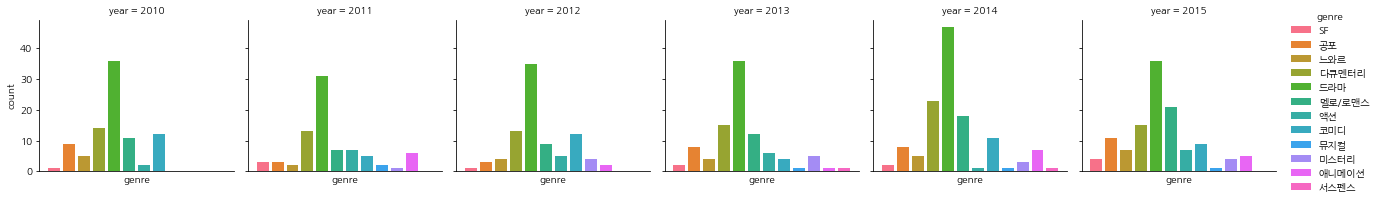

In [ ]:
# FacetGrid로 연도 별로 나누어 barplot 구하기
facet=sns.FacetGrid(year_genre,col='year',hue='genre')
facet=facet.map(plt.bar,'genre','count')
facet=facet.add_legend()
plt.gca().set_xticks([])
plt.xticks([])
ax.set_xticks([]) # x축 눈금 제거
plt.show()

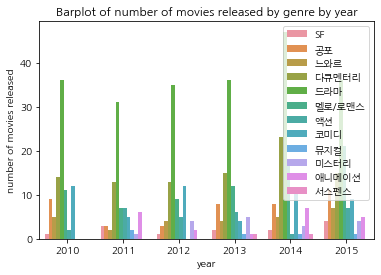

In [ ]:
# 한 그림에 모든 연도 표현하기
sns.barplot(x='year',y='count',hue='genre',data=year_genre)
plt.legend(loc = 'upper right')
plt.title('Barplot of number of movies released by genre by year')
plt.ylabel('number of movies released')
plt.show()

# 6. genre - box_off_num의 관계
:관객수가 가장 많은 영화 장르 Top5를 뽑아 관객들의 장르 별 선호도를 파악해보기

- 드라마, 코미디, 액션, 느와르, 멜로/로맨스 순으로 관객수가 많음을 알 수 있다.

- 드라마 장르가 관객수가 다음으로 많은 코미디 장르보다 2배 이상 많을 정도로 다른 장르에 비해 압도적으로 관객수가 많음을 알 수 있다.

In [ ]:
top5=train[['genre','box_off_num']].groupby(['genre']).sum('box_off_num').sort_values(['box_off_num'],ascending=False).head(5)
top5.reset_index(inplace=True)
top5

,genre,box_off_num
0,드라마,138277444
1,코미디,63277442
2,액션,61711274
3,느와르,61119768
4,멜로/로맨스,33225507


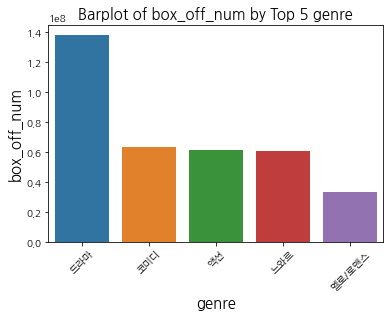

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.xticks(rotation = 45)
ax=sns.barplot(x='genre',y='box_off_num',data=top5)
ax.set_title('Barplot of box_off_num by Top 5 genre', fontsize=15)
ax.set_xlabel('genre',fontsize=15)
ax.set_ylabel('box_off_num',fontsize=15)
plt.show()

# 7. genre - year - box_off_num 관계

:연도 별로 장르 별 관객수를 파악하여 관객들이 특정 장르의 영화를 얼마나 많이 관람했는지 파악해보기

- 드라마 장르의 영화는 12,13,14년도에 관객수가 많음을 알 수 있다.

- 느와르 장르의 영화는 12,15년도에 관객수가 많음을 알 수 있다.

- 미스터리 장르의 영화는 12,15년도에 관객수가 많음을 알 수 있다.

- SF 장르의 영화는 13,14년도에 관객수가 많음을 알 수 있다.

- 애니메이션 장르의 영화는 11년도에 관객수가 많음을 알 수 있다.

In [ ]:
year_genre_box=train[['year','genre','box_off_num']].groupby(['year','genre']).sum() # 연도 별 장르 별 총 관객 수
year_genre_box.reset_index(inplace=True)
year_genre_box

,year,genre,box_off_num
0,2010,SF,2130645
1,2010,공포,5720366
2,2010,느와르,8175580
3,2010,다큐멘터리,660481
4,2010,드라마,10079903
...,...,...,...
59,2015,뮤지컬,862
60,2015,미스터리,5801847
61,2015,애니메이션,807764
62,2015,액션,17882814


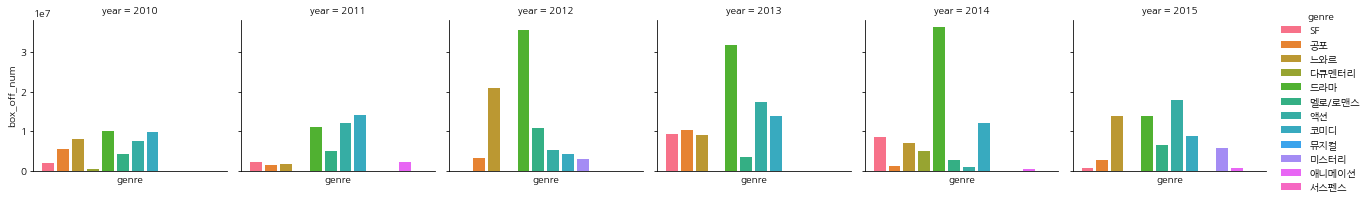

In [ ]:
# FacetGrid로 연도 별로 나누어 barplot 구하기
facet=sns.FacetGrid(year_genre_box,col='year',hue='genre')
facet=facet.map(plt.bar,'genre','box_off_num')
facet=facet.add_legend()
plt.gca().set_xticks([])
plt.xticks([])
ax.set_xticks([]) # x축 눈금 제거
plt.show()

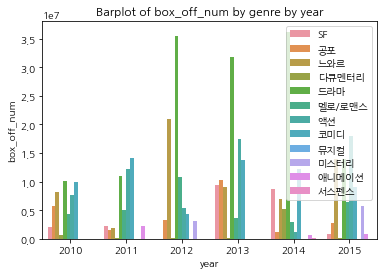

In [ ]:
# 한 그림에 모든 연도 표현하기
sns.barplot(x='year',y='box_off_num',hue='genre',data=year_genre_box)
plt.legend(loc = 'upper right')
plt.title('Barplot of box_off_num by genre by year')
plt.show()

# 8. genre - time 관계

: 장르 별 평균 영화 상영시간의 차이 파악하기

* 느와르 장르의 **평균 영화 상영시간**이 약 115분으로 가장 긴 것을 알 수 있다.
* 애니메이션 장르의 **평균 영화 상영시간**이 약 83분으로 가장 짧음을 알 수 있다.

In [ ]:
#장르별 영화 상영시간의 평균
train_time = train.groupby('genre').mean()['time']
print(train_time)

genre
SF        101.384615
공포        100.214286
느와르       115.370370
다큐멘터리      88.053763
드라마       104.651584
멜로/로맨스     96.641026
뮤지컬       107.000000
미스터리      102.588235
서스펜스      112.000000
애니메이션      82.571429
액션        114.464286
코미디       105.264151
Name: time, dtype: float64


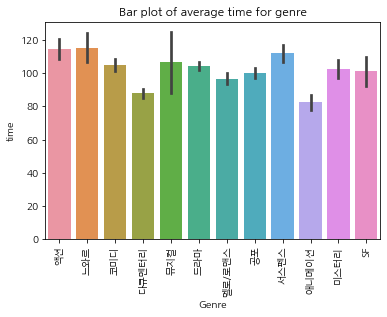

In [ ]:
#genre와 time 간의 관계를 barplot으로 시각화
ax = plt.subplots()
ax = sns.barplot(x = 'genre',y = 'time',data=train)
ax.set_title('Bar plot of average time for genre')
ax.set_xlabel('Genre')
ax.set_ylabel('time')
plt.xticks(fontsize=10,rotation=90)
plt.show()

# 9. genre - distributor 관계

: 특정 장르를 많이 만드는 배급사 파악

* 롯데엔터테인먼트와 CJ 엔터테인먼트가 제작에 가장 많이 참여했음을 알 수 있다.
* 대부분의 배급사에서 드라마 장르를 가장 많이 제작했음을 알 수 있다.


In [ ]:
#top5 배급사
train['distributor'].value_counts().sort_values(ascending=False)[:5]

In [ ]:
#top5 배급사의 자료만 뽑아내기
dist_list = ['CJ 엔터테인먼트','롯데엔터테인먼트','(주)NEW','(주)마운틴픽쳐스','(주)쇼박스']
train_top5 = train[train['distributor'].isin(dist_list)]

print(train_top5)

              title distributor genre release_time  time screening_rat  \
0            개들의 전쟁    롯데엔터테인먼트    액션   2012-11-22    96      청소년 관람불가   
1              내부자들      (주)쇼박스   느와르   2015-11-19   130      청소년 관람불가   
2         은밀하게 위대하게      (주)쇼박스    액션   2013-06-05   123       15세 관람가   
3          나는 공무원이다      (주)NEW   코미디   2012-07-12   101        전체 관람가   
5    강철대오 : 구국의 철가방    롯데엔터테인먼트   코미디   2012-10-25   113       15세 관람가   
..              ...         ...   ...          ...   ...           ...   
595              해무      (주)NEW   드라마   2014-08-13   111      청소년 관람불가   
596            파파로티      (주)쇼박스   드라마   2013-03-14   127       15세 관람가   
597           살인의 강   (주)마운틴픽쳐스    공포   2010-09-30    99      청소년 관람불가   
598          악의 연대기   CJ 엔터테인먼트   느와르   2015-05-14   102       15세 관람가   
599             베를린   CJ 엔터테인먼트    액션   2013-01-30   120       15세 관람가   

    director  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  \
0        조병옥             NaN  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


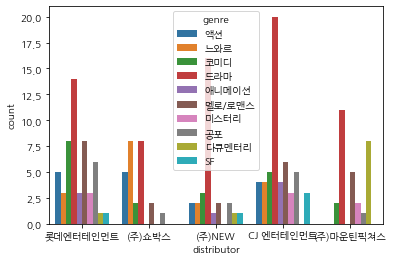

In [ ]:
#distributor 별 장르의 수 시각화
ax = plt.subplots()
ax = sns.countplot('distributor',data=train_top5,hue='genre')

# 10. screening_rat - box_off_num 의 관계 
: 어떤 상영등급에서 관객수가 많은지 파악해보기

- 가장 보편적인 **15세 관람가**에서 가장 많은 관객수가 나타남을 알 수 있음
- **전체 관람가**보다 **청소년 관람불가**에서 더 많은 관객수가 나타남
- 관객수의 최댓값은 **12세 관람가**에서 가장 크게 나타남
- 관객수의 최솟값은 **청소년 관람불가**에서 가장 낮게 나타남

In [ ]:
# 상영등급별 관객수 평균 구하기
train_rat_mean = train.groupby('screening_rat').mean()['box_off_num']
print(train_rat_mean)

screening_rat
12세 관람가     8.449809e+05
15세 관람가     1.247519e+06
전체 관람가      1.351005e+05
청소년 관람불가    3.641813e+05
Name: box_off_num, dtype: float64


In [ ]:
# 상영등급별 관객수 최댓값 구하기
train_rat_max = train.groupby('screening_rat').max()['box_off_num']
print(train_rat_max)

screening_rat
12세 관람가     14262766
15세 관람가     12983841
전체 관람가       4802169
청소년 관람불가     7072501
Name: box_off_num, dtype: int64


In [ ]:
# 상영등급별 관객수 최솟값 구하기
train_rat_min = train.groupby('screening_rat').min()['box_off_num']
print(train_rat_min)

screening_rat
12세 관람가     90
15세 관람가     36
전체 관람가      65
청소년 관람불가     1
Name: box_off_num, dtype: int64


Text(0, 0.5, 'box_off_num')

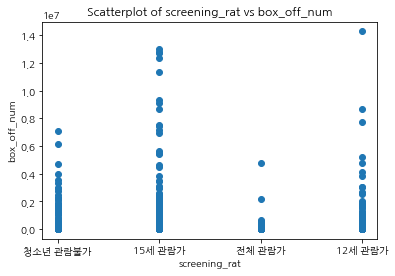

In [ ]:
# 상영등급과 관객수 scatter plot 구하기
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(train['screening_rat'],train['box_off_num'])
axes1.set_title('Scatterplot of screening_rat vs box_off_num')
axes1.set_xlabel('screening_rat')
axes1.set_ylabel('box_off_num')

# 11. genre - screening_rat - box_off_num 의 관계 
: 장르별로 상영등급과 관객수 관계 파악하기

- 각 genre 별로 영화가 존재하지 않는 상영등급도 있음을 알 수 있음
- 특히 서스펜스에서는 청소년 관람불가 외에 다른 장르가 데이터에 존재하지 않음
- 액션, 느와르, 코미디, 드라마, 공포, 멜로/로맨스, SF는 15세 관람가가 가장 많이 나타남을 알 수 있음
- 다큐멘터리와 미스터리, 애니메이션은 전체 관람가가 가장 많이 나타남을 알 수 있음

In [ ]:
# 장르별 상영등급 count
train_rat_genre = train.groupby('genre')['screening_rat'].value_counts()
print(train_rat_genre)

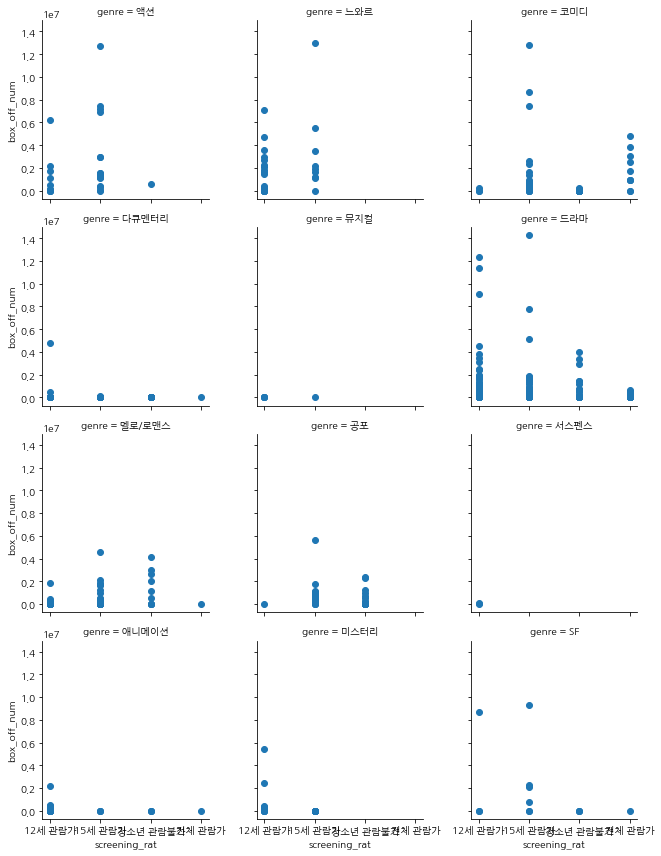

In [ ]:
# 장르별 상영등급과 관객 수 scatterplot
facet = sns.FacetGrid(train, col='genre', col_wrap=3)
facet = facet.map(plt.scatter, 'screening_rat', 'box_off_num')
facet = facet.add_legend()